# Project 2 - Markdown

**To be implemented (optional)**
- fast_Conv2d

### class Module() - Sequential type

**Parameters**

- `self.layer_type`: specify the type of the layer, `'Sequential'`.

- `self.layer_sequence`: initialized as \[ \]; list of layer modules (in order of appending).
  
- `self.dtype`: default `torch.float32`.

- `self.device`: default **None**

*Not used for 'Sequential' module*

- `self.if_batchnorm`: if the layer should use batch normalization, **None** in Sequential module.

- `self.activation_type`: specify the type of activation function, **None** in Sequential module.

- `self.params_shape`: specify the shape of weights, **None** in Sequential module.

- `self.params`: `{'weight', 'bias' }` after initialization.
    
- `self.bn_param`: parameters for batch normalization, dictionary.

- `self.conv_param`: padding and stride step for Conv2d layer, dictionary.


**Public Methods**

- `print_module()`: print information of module, not implemented.

- `append(Module)`: append an input layer module to the end of sequence.

- `output, cache = forward(input, mode='train')`: same as in Linear, but use all layers in the sequence.
    - `cache`: list of tuples/tensors, `[cache_layer_1, ..., cache_layer_N]`.


- `loss, d_loss = loss(output, target, regularization)`: same as in Linear.

- `d_input, d_params = backward(d_output, cache)`: backward pass, `d_loss` as `d_output`; all gradient are not averaged over the number of input samples.
    - `d_params`: list of dictionary, `[d_params_1, ..., d_params_N]`;
    - `d_params_i`: {`'d_weight'`, `'d_bias'`, `'d_gamma'`, `'d_beta'`}.


- `update_params(d_params, learning_rate, regularization)`: update the parameters layer by layer.

**Private Methods**

***layer level***
- `output, cache = _sequential_forward(input, mode='train')`: 

- `d_input, d_params = _sequential_backward(d_output, cache)`: 

- `_sequential_update_params(d_params, learning_rate, regularization)`: 

- `_sequential_append(Module)`: 


### class Module() - Single Linear/Conv2d layer type
**Parameters**
- `self.layer_type`: specify the type of the layer, `'Linear'` or `'Conv2d'`.

- `self.if_batchnorm`: if the layer should use batch normalization, **True** or **False**.

- `self.activation_type`: specify the type of activation function, **None** or `'relu'` or `'tanh'` or `'sigmoid'`.

- `self.params_shape`: specify the shape of weights, `(dim_in, dim_out)` for `'Linear'`; `(channel_out, channel_in, kernel_height, kernel_width)` for `'Conv2d'`.

- `self.params`: `{'weight', 'bias' }` after initialization.
    - **for Linear**
    - `'weight'`: at initialization, normal distribution, Size(dim_in, dim_out)
    - `'bias'`: at initialization, normal distribution, Size(1, dim_out)
    - **for Conv2d**
    - `'weight'`: at initialization, normal distribution, Size(channel_out, channel_in, kernel_height, kernel_width)
    - `'bias'`: at initialization, normal distribution, Size(channel_out, )
    

- `self.bn_param`: parameters for batch normalization, dictionary.
    - `'eps'`: default 1e-5, to avoid dividing 0.
    - `'momentum'`: default 0.9.
    - `'if_initialized'`: if the bn_param is initialized w.r.t the input.
    - `'gamma'`: 
    - `'beta'`: `gamma*input_normed + beta`
    - `'running_mean'`: `momentum*running_mean + (1-momentum)*sample_mean`
    - `'running_var'`: `momentum*running_var + (1-momentum)*sample_var`

- `self.conv_param`: padding and stride step for Conv2d layer, dictionary.
    - `'padding'`: for zero-padding, int (padding) or tuple (padding_h, padding_w).
    - `'stride'`: stride step, int (stride) or tuple (stride_h, stride_w).
    
- `self.dtype`: default `torch.float32`.

- `self.device`: default **None**

*Not used for layer*
- `self.layer_sequence`: \[ \]


**Public Methods**

- `print_module()`: print information of module, not implemented

- `output, cache = forward(input, mode='train')`: forward pass, `mode` used for batchnorm; `cache` will be passed to backward method.

- `loss, d_loss = loss(output, target, regularization)`: compute loss and the gradient of loss, d_loss will be passed to backward method; `loss, _ = loss(output, target, regularization)` for testing.

- `d_input, d_params = backward(d_output, cache)`: backward pass, `d_loss` as `d_output`; all gradient are averaged over the number of input samples.
    - `d_params`: dictionary, `'d_weight'`, `'d_bias'`, `'d_gamma'`, `'d_beta'`


- `update_params(d_params, learning_rate, regularization)`: update the parameters by `W -= lr*dW + reg*(W*W)` and `b -= lr*db`, `gamma -= lr*d_gamma`, `beta -= lr*d_beta`.

**Private Methods**

***layer level***
- `output, cache = _layer_forward(input, mode='train')`: 

- `d_input, d_params = _layer_backward(d_output, cache)`: 

- `_layer_update_params(d_params, learning_rate, regularization)`: 


***Component level***

*Linear*
- `output, cache = _forward_Linear(input)`: 

- `d_input, d_params = _backward_Linear(d_output, cache)`: 

*Conv2d*
- `output, cache = _forward_Conv2d(input)`: 

- `d_input, d_params = _backward_Conv2d(d_output, cache)`: 

*Batchnorm*
- `output, cache = _forward_batchnorm(input, mode)`: 

- `d_input, d_params = _backward_batchnorm(d_output, cache)`: 

*Activation*
- `output, cache = _forward_sigmoid(input)`: 

- `d_input = _backward_sigmoid(d_output, cache)`: 

- `output, cache = _forward_tanh(input)`: 

- `d_input = _backward_tanh(d_output, cache)`: 

- `output, cache = _forward_relu(input)`: 

- `d_input = _backward_relu(d_output, cache)`: 

*Loss*
- `loss = _compute_loss(output, target, regularization)`: 

- `d_loss = _compute_loss_gradient(output, target)`: 

- `reg_term = _compute_regularization_term(regularization)`: 

*Initialization* called in constructor
- `_initialize_Linear()`: 

- `_initialize_Conv2d()`: 

- `_activation_gain()`: 

- `_initialize_bn_param(input)`: 

*other functions* for Conv2d
- `input_padded = _zero_padding(input)`: 

- `input = _zero_unpadding(input_padded)`: 


## Single Linear layer example

In [1]:
import torch
import math
from layer_module import Module
from neural_network import NeuralNet
import matplotlib.pyplot as plt
%matplotlib inline
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
dtype = torch.float32

In [2]:
nb=64
data_input = torch.empty((nb, 2), dtype=dtype, device=device).uniform_(0, 1)
data_target = ((data_input-0.5).norm(p=2, dim=1, keepdim=True)<math.sqrt(1/2/math.pi))*1
print("Input size:", data_input.size(), " target size:", data_target.size())

Input size: torch.Size([64, 2])  target size: torch.Size([64, 1])


In [3]:
mod2 = Module(layer_type='Linear', 
              if_batchnorm=False, 
              activation_type='relu', 
              params_shape=(2, 1), 
              dtype=dtype, device=device)

accuracy on training set is 0.484375


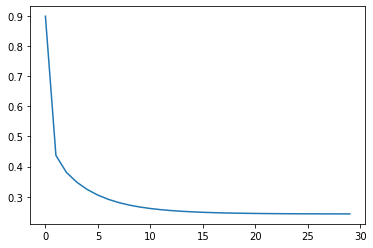

In [4]:
lr = 4e-3
reg = 0.1
loss_arr = []
for i in range(30):
    output, cache = mod2.forward(data_input, mode='train')
    loss, d_loss = mod2.loss(output, data_target, reg)
    # print("Loss is {:.3f}".format(loss.item()))
    loss_arr.append(loss.item())
    d_output, d_params = mod2.backward(d_loss, cache)
    mod2.update_params(d_params, lr, reg)
    
output, _ = mod2.forward(data_input, mode='test')
print("accuracy on training set is", torch.mean(1.0*((output>0.5)==data_target)).item())
plt.plot(loss_arr)
plt.show()

## Sequential example (with only linear layers)

In [5]:
nb=64
data_input = torch.empty((nb, 2), dtype=dtype, device=device).uniform_(0, 1)
data_target = ((data_input-0.5).norm(p=2, dim=1, keepdim=True)<math.sqrt(1/2/math.pi))*1
print("Input size:", data_input.size(), " target size:", data_target.size())
lr = 5e-4
reg = 0.0

Input size: torch.Size([64, 2])  target size: torch.Size([64, 1])


In [6]:
mod3 = Module(layer_type='Sequential', 
              dtype=dtype, device=device)
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(2, 100), 
              dtype=dtype, device=device))
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(100, 50), 
              dtype=dtype, device=device))
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(50, 20), 
              dtype=dtype, device=device))
mod3.append(Module(layer_type='Linear', 
              if_batchnorm=False, 
              activation_type='relu', 
              params_shape=(20, 1), 
              dtype=dtype, device=device))

accuracy on training set is 0.9375


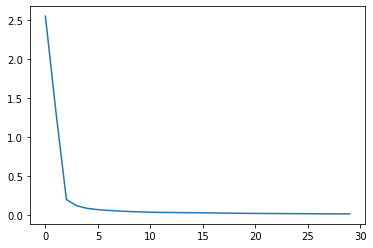

In [7]:
loss_arr = []
for i in range(30):
    output, cache = mod3.forward(data_input, mode='train')
    loss, d_loss = mod3.loss(output, data_target, reg)
    # print("Loss is {:.3f}".format(loss.item()))
    loss_arr.append(loss.item())
    d_input, d_params = mod3.backward(d_loss, cache)
    # print(d_params)
    mod3.update_params(d_params, lr, reg)
    
output, _ = mod3.forward(data_input, mode='test')
print("accuracy on training set is", torch.mean(1.0*((output>0.5)==data_target)).item())
plt.plot(loss_arr)
plt.show()

## SGD (with mini_batch) example

In [3]:
nb=1000
data_input = torch.empty((nb, 2), dtype=dtype, device=device).uniform_(0, 1)
data_target = ((data_input-0.5).norm(p=2, dim=1, keepdim=True)<math.sqrt(1/2/math.pi))*1
print("Input size:", data_input.size(), " target size:", data_target.size())

Input size: torch.Size([1000, 2])  target size: torch.Size([1000, 1])


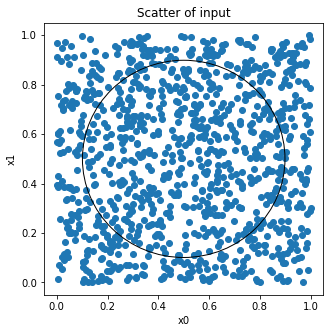

Average of train_target==1 is 0.4960000216960907


In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
circ = plt.Circle((0.5, 0.5), math.sqrt(1/2/math.pi), fill=False)
plt.scatter(data_input[:, 0].cpu(), data_input[:, 1].cpu())
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter of input')
ax.add_patch(circ)
plt.show()

print('Average of train_target==1 is', torch.mean(data_target*1.0).item())
# print('Average of test_target==1 is', torch.mean(test_target*1.0).item())

In [5]:
net1 = NeuralNet(layer_type='Sequential', learning_rate=2e-3, 
                 regularization=0.05, iteration=1000, batch_size=64,
                 dtype=dtype, device=device)
net1.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(2, 100), 
              dtype=dtype, device=device))
net1.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(100, 50), 
              dtype=dtype, device=device))
net1.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(50, 20), 
              dtype=dtype, device=device))
net1.append(Module(layer_type='Linear', 
              if_batchnorm=False, 
              activation_type=None, 
              params_shape=(20, 1), 
              dtype=dtype, device=device))

In [6]:
loss_arr = net1.train(data_input, data_target)

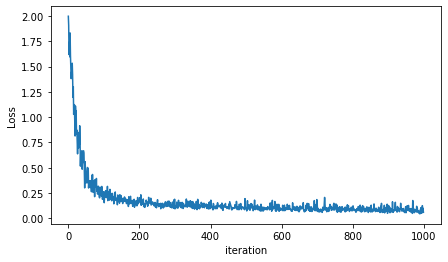

accuracy on training set is 0.9420000314712524


In [7]:
plt.figure(figsize=(7, 4))
plt.plot(loss_arr)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()
output, _ = net1.forward(data_input, mode='test')
print("accuracy on training set is", torch.mean(1.0*((output>0.5)==data_target)).item())

In [8]:
test_input = torch.empty((nb, 2), dtype=dtype, device=device).uniform_(0, 1)
test_target = ((test_input-0.5).norm(p=2, dim=1, keepdim=True)<math.sqrt(1/2/math.pi))*1
output, _ = net1.forward(test_input, mode='test')
print("accuracy on testing set is", torch.mean(1.0*((output>0.5)==test_target)).item())

accuracy on testing set is 0.9460000395774841


## SGD (with mini-batch and Conv2d) example

In [9]:
device = 'cpu'
nb=500
data_input = torch.empty((nb, 3, 4, 4), dtype=dtype, device=device).uniform_(0, 1)
data_target = ((data_input.reshape(nb, -1)-0.5).norm(p=2, dim=1, keepdim=True)<2)*1
print("Input size:", data_input.size(), " target size:", data_target.size())
print('Average of train_target==1 is', torch.mean(data_target*1.0).item())
# print((data_input.reshape(nb, -1)-0.5).norm(p=2, dim=1, keepdim=True).mean())

Input size: torch.Size([500, 3, 4, 4])  target size: torch.Size([500, 1])
Average of train_target==1 is 0.4959999918937683


In [10]:
net2 = NeuralNet(layer_type='Sequential', learning_rate=2.1e-3, 
                 regularization=0.22, iteration=400, batch_size=32,
                 dtype=dtype, device=device)
net2.append(Module(layer_type='Conv2d', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(8, 3, 3, 3), 
              conv_param={'padding':1, 'stride':1},
              dtype=dtype, device=device))
net2.append(Module(layer_type='Conv2d', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(16, 8, 3, 3), 
              conv_param={'padding':1, 'stride':1},
              dtype=dtype, device=device))
net2.append(Module(layer_type='Linear', 
              if_batchnorm=True, 
              activation_type='relu', 
              params_shape=(16*4*4, 100), 
              dtype=dtype, device=device))
net2.append(Module(layer_type='Linear', 
              if_batchnorm=False, 
              activation_type=None, 
              params_shape=(100, 1), 
              dtype=dtype, device=device))

In [ ]:
loss_arr = net2.train(data_input, data_target)

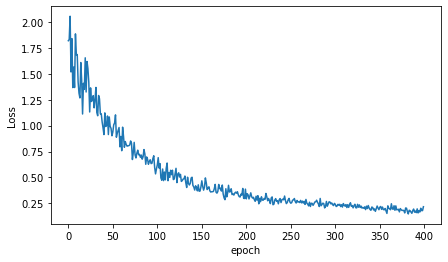

accuracy on training set is 0.8600000143051147


In [26]:
plt.figure(figsize=(7, 4))
plt.plot(loss_arr)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()
output, _ = net2.forward(data_input, mode='test')
print("accuracy on training set is", torch.mean(1.0*((output>0.5)==data_target)).item())

In [27]:
data_input = torch.empty((nb, 3, 4, 4), dtype=dtype, device=device).uniform_(0, 1)
data_target = ((data_input.reshape(nb, -1)-0.5).norm(p=2, dim=1, keepdim=True)<2)*1
print("Testing data:")
print("    Input size:", data_input.size(), " target size:", data_target.size())
output, _ = net2.forward(data_input, mode='test')
print("accuracy on testing set is", torch.mean(1.0*((output>0.5)==data_target)).item())
print(" ")

Testing data:
    Input size: torch.Size([500, 3, 4, 4])  target size: torch.Size([500, 1])
accuracy on testing set is 0.6579999923706055
 
